In [13]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [15]:
import pandas as housing 
housing = pd.read_csv("raw_house_data.csv")

In [16]:
import pandas as housing 

In [17]:
housing = pd.read_csv("raw_house_data.csv")

In [18]:
housing.head

<bound method NDFrame.head of            MLS  sold_price  zipcode   longitude   latitude  lot_acres  \
0     21530491   5300000.0    85637 -110.378200  31.356362    2154.00   
1     21529082   4200000.0    85646 -111.045371  31.594213    1707.00   
2      3054672   4200000.0    85646 -111.040707  31.594844    1707.00   
3     21919321   4500000.0    85646 -111.035925  31.645878     636.67   
4     21306357   3411450.0    85750 -110.813768  32.285162       3.21   
...        ...         ...      ...         ...        ...        ...   
4995  21810382    495000.0    85641 -110.661829  31.907917       4.98   
4996  21908591    550000.0    85750 -110.858556  32.316373       1.42   
4997  21832452    475000.0    85192 -110.755428  32.964708      12.06   
4998  21900515    550000.0    85745 -111.055528  32.296871       1.01   
4999   4111490    450000.0    85621 -110.913054  31.385259       4.16   

         taxes  year_built  bedrooms bathrooms sqrt_ft garage  \
0      5272.00        1941  

In [5]:
housing.dtypes


MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces           object
floor_covering       object
HOA                  object
dtype: object

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

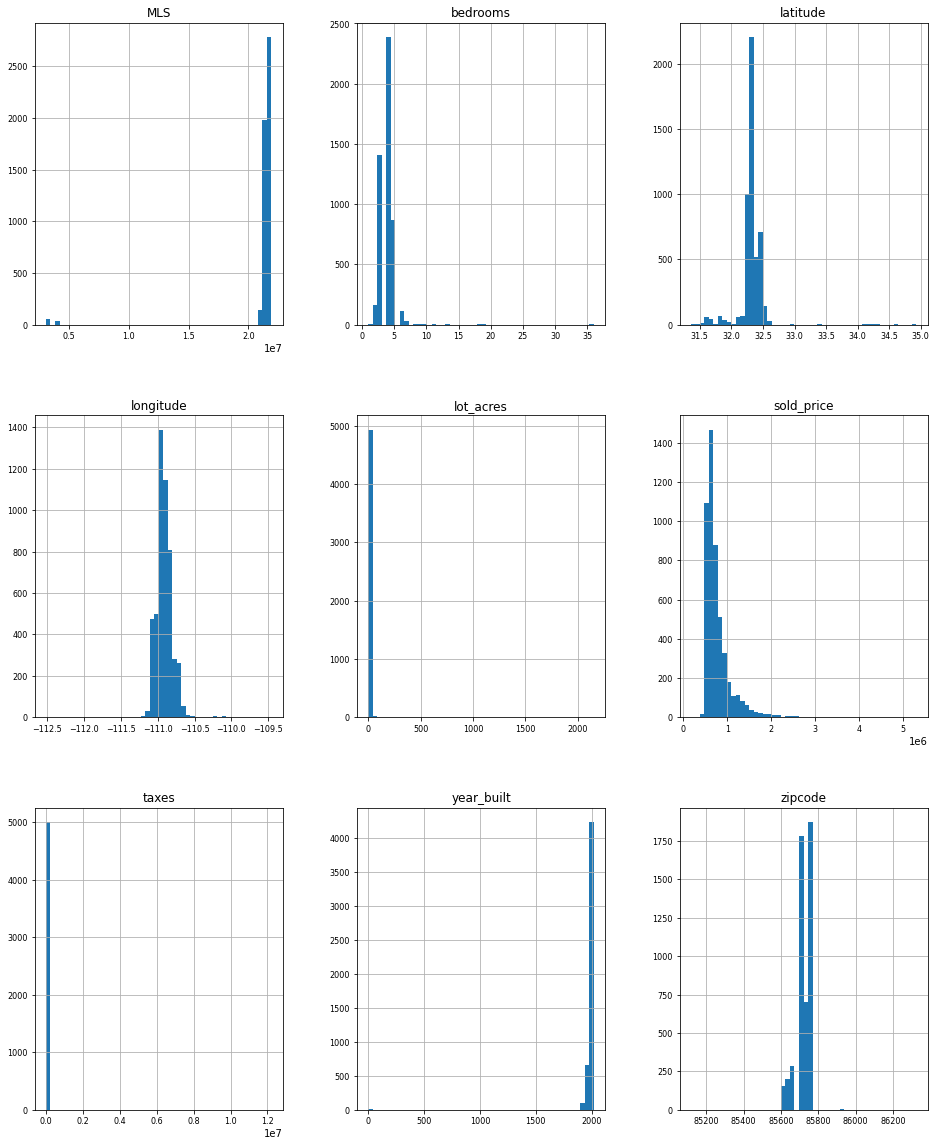

In [7]:
housing.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [8]:
housing.describe

<bound method NDFrame.describe of            MLS  sold_price  zipcode   longitude   latitude  lot_acres  \
0     21530491   5300000.0    85637 -110.378200  31.356362    2154.00   
1     21529082   4200000.0    85646 -111.045371  31.594213    1707.00   
2      3054672   4200000.0    85646 -111.040707  31.594844    1707.00   
3     21919321   4500000.0    85646 -111.035925  31.645878     636.67   
4     21306357   3411450.0    85750 -110.813768  32.285162       3.21   
...        ...         ...      ...         ...        ...        ...   
4995  21810382    495000.0    85641 -110.661829  31.907917       4.98   
4996  21908591    550000.0    85750 -110.858556  32.316373       1.42   
4997  21832452    475000.0    85192 -110.755428  32.964708      12.06   
4998  21900515    550000.0    85745 -111.055528  32.296871       1.01   
4999   4111490    450000.0    85621 -110.913054  31.385259       4.16   

         taxes  year_built  bedrooms bathrooms sqrt_ft garage  \
0      5272.00        19

In [20]:
housing.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64

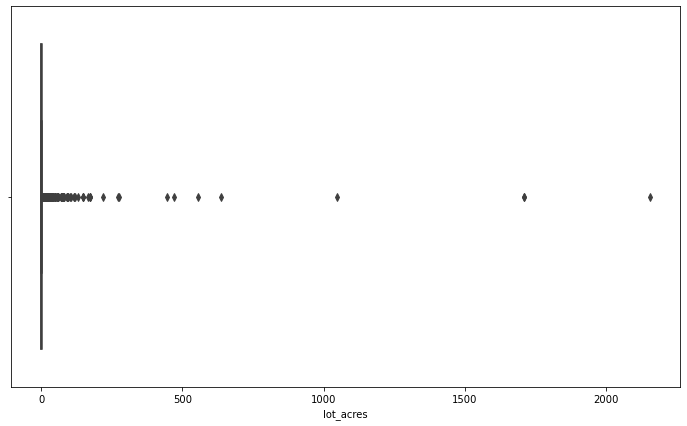

In [22]:
# Box plot of column(s) with missing values to understand distribution
plt.figure(figsize=(12,7))
sns.boxplot(housing.lot_acres)

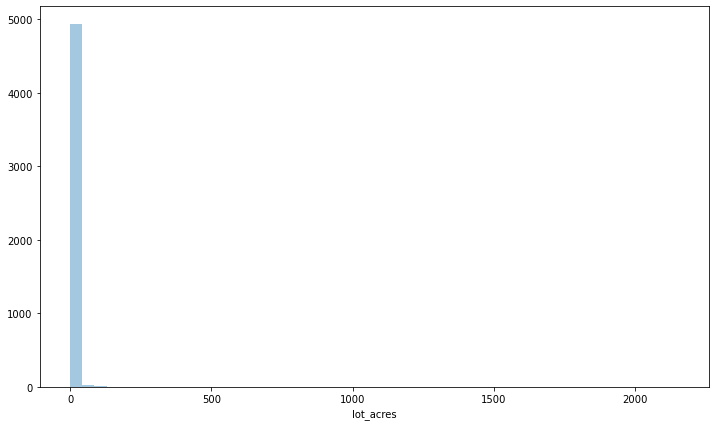

In [24]:
plt.figure(figsize=(12,7))
sns.distplot(a=housing['lot_acres'], kde=False)

In [26]:
housing = housing.replace(r'^\s*$', np.nan, regex=True)

In [27]:
housing = housing.fillna(0)

In [30]:
colu = list(housing.columns)
housing = housing[colu].replace(['None'], 0)

In [33]:
cols = ['sqrt_ft', 'bedrooms']
housing[cols] = housing[cols].astype('float')
housing.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms            float64
bathrooms            object
sqrt_ft             float64
garage               object
kitchen_features     object
fireplaces           object
floor_covering       object
HOA                  object
dtype: object

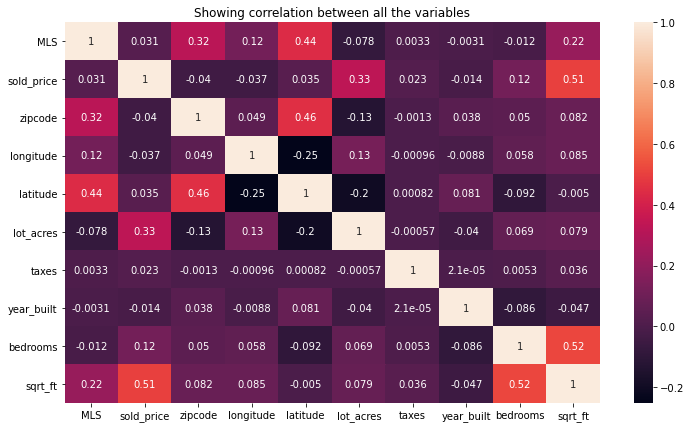

In [34]:
plt.figure(figsize=(12,7))

# Add title
plt.title("Showing correlation between all the variables")

# Add label for horizontal axis
plt.xlabel("Variables")
plt.ylabel("Variables")

sns.heatmap(housing.corr(), annot=True)

<Figure size 864x504 with 0 Axes>

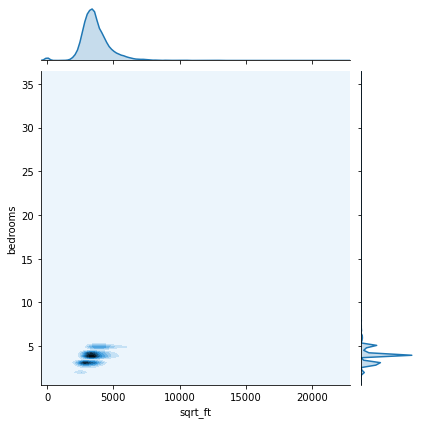

In [36]:
plt.figure(figsize=(12,7))
sns.jointplot(x=housing['sqrt_ft'], y=housing['bedrooms'], kind="kde")

In [38]:
object_cols = [col for col in housing.columns if housing[col].dtype == "object"]

In [39]:
housing_ohe = pd.get_dummies(housing[object_cols], prefix=object_cols, drop_first=False)
housing = pd.concat([housing, housing_ohe], axis=1)

In [40]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 2633 entries, MLS to HOA_99.66
dtypes: float64(7), int64(3), object(6), uint8(2617)
memory usage: 13.1+ MB


In [47]:
housing.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,sqrt_ft,...,HOA_925,HOA_93,HOA_94,HOA_95,HOA_96,HOA_97,HOA_97.66,HOA_98,HOA_99,HOA_99.66
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.00000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.651994,9.402828e+03,1992.32800,3.933800,3674.743520,...,0.000200,0.000400,0.000200,0.002200,0.000400,0.002600,0.000200,0.001200,0.003400,0.000200
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.633929,1.729385e+05,65.48614,1.245362,1181.036779,...,0.014142,0.019998,0.014142,0.046857,0.019998,0.050929,0.014142,0.034624,0.058216,0.014142
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,3032.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,3499.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.750000,8.082830e+03,2006.00000,4.000000,4120.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000,22408.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
housing.to_csv('pima_housing.csv')